<a href="https://colab.research.google.com/github/vitordiego/analisededados/blob/main/02-Join_de_Dados_com_Pandas_Vitor_Diego_Ramos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Join de Dados com Pandas**

> Bloco com recuo



O pacote Pandas é uma ferramenta poderosa para manipular e transformar dados em Python, ao trabalhar em uma análise, os dados necessários podem estar em várias tabelas.
Mesclar tabelas torna-se uma ação necessária em diversos casos, facilitando a manipulação dos dados.



Em muitas aplicações, os dados podem estar espalhados em vários arquivos ou bancos de dados, ou podem estar organizados em um formato que não seja fácil de analisar.

McKinney, Wes. Python para análise de dados (p. 304). Novatec Editora. Edição do Kindle. 

## Dataset

https://www.kaggle.com/jeffgallini/college-football-team-stats-2019?select=cfb13.csv


Contexto
O futebol americano universitário é uma das fascinações mais duradouras da cultura americana. Seus rankings de TV rotineiramente dominam as programações de TV do outono. . O NCAA tem um site de estatísticas, mas não contém todas as informações da equipe e usa muitas siglas que são obscuras.

Com os dados disponíveis, fui em frente e analisei as estatísticas do time para cada temporada de futebol universitário de 2013 até o presente.

Conteúdo
Dentro dos dados estão as estatísticas de todos os times de nível FBS no ano da temporada universitária, incluindo ofensiva, defensiva, turnover, redzone, times especiais, first down, third down e quarta down estatísticas. Existem cerca de 145 estatísticas de equipes diferentes que podem ser usadas.

Todas essas informações são graças ao site de estatísticas da NCAA, que torna os dados fáceis de usar e encontrar. Veja mais aqui: https://www.ncaa.com/stats/football/fbs

In [ ]:
# instalar o pacote Kaggle que será usado para importar os dados.
!pip install kaggle

In [ ]:
# salve o arquivo json com suas credenciais em seu computador e envie esse arquivo para o Colab 
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"vitordiegoramos","key":"e8b680d15486d8471a963a2c33d84759"}'}

In [ ]:
# O cliente da API Kaggle espera que o arquivo json esteja na pasta ~ / .kaggle, então vamos criar uma nova pasta e movê-la para dentro
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d jeffgallini/college-football-team-stats-2019

college-football-team-stats-2019.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Visualizar asquivo(s) importados
!ls

 college-football-team-stats-2019.zip  'kaggle (1).json'   kaggle.json
 files				       'kaggle (2).json'   sample_data


In [ ]:
# Descompactar arquivos zipados
import zipfile
zip_ref = zipfile.ZipFile("college-football-team-stats-2019.zip", "r")
zip_ref.extractall("files")
zip_ref.close()

## Importando Bibliotecas

In [ ]:
!pip install inflection
import pandas as pd
import inflection
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Carregar dados
df13 = pd.read_csv("/content/files/cfb13.csv")
df14 = pd.read_csv("/content/files/cfb14.csv")
df15 = pd.read_csv("/content/files/cfb15.csv")
df16 = pd.read_csv("/content/files/cfb16.csv")
df17 = pd.read_csv("/content/files/cfb17.csv")
df18 = pd.read_csv("/content/files/cfb18.csv")
df19 = pd.read_csv("/content/files/cfb19.csv")
df20 = pd.read_csv("/content/files/cfb20.csv")

In [ ]:
print(df13.shape, df14.shape, df15.shape, df16.shape, df17.shape, df18.shape, df19.shape, df20.shape)

(111, 146) (113, 146) (115, 146) (116, 152) (129, 152) (129, 152) (130, 152) (127, 152)


In [ ]:
df19.head(3)

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Deflected.Extra.Points,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
0,Air Force (Mountain West),13,11,2,51,881,5483,6.22,55,421.8,17,752,4155,5.53,32,34,319.6,9,77,131,8,216,9,77,131,8,216,5,16,21,0.762,44,13,28,0.464,82,36,26,772,0,...,0,9,0,258,19.8,21,58,52,1,1,13,0,443,34.1,125,37,34,247,54,4.2,2,157,84,0.535,79,64,158,0.405,2,448:07,34:28,78,9,7,16,12,6,18,-2,-0.15
1,Akron (MAC),12,0,12,130,725,2918,4.02,14,243.2,83,871,4967,5.70,51,56,413.9,58,138,106,17,261,58,138,106,17,261,124,7,22,0.318,74,8,15,0.533,1,15,13,223,0,...,0,14,0,435,36.3,130,15,13,1,0,7,0,126,10.5,124,37,28,147,51,4.3,130,163,43,0.264,130,98,185,0.530,122,317:52,26:29,128,6,5,11,12,14,26,-15,-1.25
2,Alabama (SEC),13,11,2,6,842,6640,7.89,76,510.8,20,877,4217,4.81,24,26,324.4,40,95,121,31,247,40,95,121,31,247,12,13,19,0.684,11,7,19,0.368,11,27,35,469,0,...,0,20,0,242,18.6,2,83,80,0,0,12,0,614,47.2,61,61,34,317,78,6.0,3,153,80,0.523,35,66,185,0.357,70,389:58,29:59,3,11,17,28,4,6,10,18,1.38


In [ ]:
# Incluir a coluna Year para identificar o ano de origem do DataFrame
df13["Year"] = 2013
df14["Year"] = 2014
df15["Year"] = 2015
df16["Year"] = 2016
df17["Year"] = 2017
df18["Year"] = 2018
df19["Year"] = 2019
df20["Year"] = 2020

In [ ]:
df13.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,...,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Akron (MAC),12,5,7,106,837,4104,4.90,30,31,342.0,59,865,4764,5.51,43,44,397.0,54,106,133,19,258,54,106,133,19,258,101,7,18,0.389,27,7,17,0.412,11,39,716,0,...,12,1,343,28.6,108,31,29,0,0,9,0,242,20.2,81,51,32,251,67,5.6,71,183,72,0.393,93,75,175,0.429,74,352:08,29:20,74,6,13,19,11,10,21,-2,-0.17,2013
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65,454.1,5,771,3725,4.83,21,23,286.5,4,78,101,15,194,4,78,101,15,194,33,7,12,0.583,3,5,19,0.263,51,68,1400,0,...,7,0,181,13.9,17,65,65,0,0,13,1,496,38.2,94,53,32,245,69,5.3,17,147,70,0.476,24,61,176,0.347,24,416:04,32:00,48,8,11,19,10,7,17,2,0.15,2013
2,Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57,458.5,62,991,5214,5.26,38,39,401.1,79,122,139,15,276,79,122,139,15,276,98,12,30,0.400,43,12,26,0.462,27,41,801,0,...,15,1,315,24.2,36,57,53,1,0,12,1,435,33.5,65,63,28,255,77,5.9,19,212,100,0.472,61,83,211,0.393,96,370:31,28:30,39,4,18,22,11,7,18,4,0.31,2013
3,Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69,457.3,42,942,5213,5.53,45,48,372.4,30,94,135,14,243,30,94,135,14,243,26,15,25,0.600,93,13,22,0.591,64,64,1365,1,...,14,1,373,26.6,10,69,63,1,0,25,1,556,39.7,20,85,32,413,101,7.2,76,215,84,0.391,44,79,213,0.371,51,424:56,30:21,7,12,21,33,6,12,18,15,1.07,2013
4,Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30,357.2,76,814,4961,6.09,46,49,413.4,64,127,127,12,266,64,127,127,12,266,74,7,15,0.467,105,9,14,0.643,108,12,291,0,...,9,0,369,30.8,105,30,29,0,0,13,0,248,20.7,81,52,30,294,67,5.6,55,156,65,0.417,94,66,152,0.434,46,365:17,30:26,111,6,8,14,12,11,23,-9,-0.75,2013


In [ ]:
# Selecionar as 5 primeiras colunas de cada datset
df13_test = df13.iloc[:, 0:5]
df13_test

,Team,Games,Win,Loss,Off.Rank
0,Akron (MAC),12,5,7,106
1,Alabama (SEC),13,11,2,33
2,Arizona (Pac-12),13,8,5,31
3,Arizona St. (Pac-12),14,10,4,32
4,Arkansas (SEC),12,3,9,99
...,...,...,...,...,...
106,Washington St. (Pac-12),13,6,7,54
107,West Virginia (Big 12),12,4,8,62
108,Western Ky. (Sun Belt),12,8,4,30
109,Western Mich. (MAC),12,1,11,110


## Inner join

A mesclagem pega o primeiro DataFrame com o segundo, o argumento *on* informamos qual a coluna desejada.

In [ ]:
# Vamos reduzir 2 Dataframes para o uso desse método:

df13_red = df13.iloc[:, 0:5]
df14_red = df14.iloc[:, 0:5]
df14_red.head()

,Team,Games,Win,Loss,Off.Rank
0,Akron (MAC),12,5,7,88
1,Alabama (SEC),14,12,2,17
2,Arizona (Pac-12),14,10,4,25
3,Arizona St. (Pac-12),13,10,3,34
4,Arkansas (SEC),13,7,6,60


In [ ]:
df_inner_join = df13_red.merge(df14_red, on="Team")
df_inner_join.head()

,Team,Games_x,Win_x,Loss_x,Off.Rank_x,Games_y,Win_y,Loss_y,Off.Rank_y
0,Akron (MAC),12,5,7,106,12,5,7,88
1,Alabama (SEC),13,11,2,33,14,12,2,17
2,Arizona (Pac-12),13,8,5,31,14,10,4,25
3,Arizona St. (Pac-12),14,10,4,32,13,10,3,34
4,Arkansas (SEC),12,3,9,99,13,7,6,60


In [ ]:
# Inner join considerando a coluna "Team" para mesclagem
df_inner_join = df13_red.merge(df14_red, on="Team", suffixes=("_2013", "_2014"))
df_inner_join.head()

,Team,Games_2013,Win_2013,Loss_2013,Off.Rank_2013,Games_2014,Win_2014,Loss_2014,Off.Rank_2014
0,Akron (MAC),12,5,7,106,12,5,7,88
1,Alabama (SEC),13,11,2,33,14,12,2,17
2,Arizona (Pac-12),13,8,5,31,14,10,4,25
3,Arizona St. (Pac-12),14,10,4,32,13,10,3,34
4,Arkansas (SEC),12,3,9,99,13,7,6,60


In [ ]:
print(df13_red.shape, df14_red.shape)
print(df_inner_join.shape)

(111, 5) (113, 5)
(101, 9)


In [ ]:
# Aplicando soma nas colunas de vitórias para comparar quantidade total em cada ano
games = df_inner_join[["Win_2013", "Win_2014"]].sum()
games

Win_2013    690
Win_2014    700
dtype: int64

### Relações um-para-muitos

**One-to-One** - cada registro/linha da tabela à esquerda estáá relacionada a uma única linha da tabela da direito - exemplo anterior **inner join**

**One-to_Many** - cada linha da tabela da esquerda está relacionada a uma ou mais linhas da tabela da direita

### Mesclar muitos DataFrame


In [ ]:
df15_red = df15.iloc[:, 0:5]

In [ ]:
# Mesclando três DataFrames
df_merg_mult_table = df13_red.merge(df14_red, on="Team", suffixes=("_2013", "_2014")) \
      .merge(df15_red,on="Team")
df_merg_mult_table.head()

,Team,Games_2013,Win_2013,Loss_2013,Off.Rank_2013,Games_2014,Win_2014,Loss_2014,Off.Rank_2014,Games,Win,Loss,Off.Rank
0,Akron (MAC),12,5,7,106,12,5,7,88,13,8,5,104
1,Alabama (SEC),13,11,2,33,14,12,2,17,15,14,1,45
2,Arizona (Pac-12),13,8,5,31,14,10,4,25,13,7,6,16
3,Arizona St. (Pac-12),14,10,4,32,13,10,3,34,13,6,7,24
4,Arkansas (SEC),12,3,9,99,13,7,6,60,13,8,5,29


In [ ]:
df13_red.head()

,Team,Games,Win,Loss,Off.Rank
0,Akron (MAC),12,5,7,106
1,Alabama (SEC),13,11,2,33
2,Arizona (Pac-12),13,8,5,31
3,Arizona St. (Pac-12),14,10,4,32
4,Arkansas (SEC),12,3,9,99


In [ ]:
df15_red.head()

,Team,Games,Win,Loss,Off.Rank
0,Akron (MAC),13,8,5,104
1,Alabama (SEC),15,14,1,45
2,Appalachian St. (Sun Belt),13,11,2,26
3,Arizona (Pac-12),13,7,6,16
4,Arizona St. (Pac-12),13,6,7,24


## Left join

A junção à esquerda retorna todas as linhas de dados da tabela à esquerda e apenas as linhas da tabela à direita onde as colunas principais possuem correspondência.

In [ ]:
# Redução dataframe para 5 linhas
df13_red_5row = df13_red.head()
df13_red_5row

,Team,Games,Win,Loss,Off.Rank
0,Akron (MAC),12,5,7,106
1,Alabama (SEC),13,11,2,33
2,Arizona (Pac-12),13,8,5,31
3,Arizona St. (Pac-12),14,10,4,32
4,Arkansas (SEC),12,3,9,99


In [ ]:
# Criar uma nova coluna Id
df13_red_5row["Id"] = (1, 2, 5, 1, 2)
df13_red_5row

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Team,Games,Win,Loss,Off.Rank,Id
0,Akron (MAC),12,5,7,106,1
1,Alabama (SEC),13,11,2,33,2
2,Arizona (Pac-12),13,8,5,31,5
3,Arizona St. (Pac-12),14,10,4,32,1
4,Arkansas (SEC),12,3,9,99,2


In [ ]:
# Criar nova DataFrame com 2 colunas e mudar valores da coluna Id
df13_red_5rowid = df13_red_5row.loc[: , ["Team", "Id"]]
df13_red_5rowid["Id"] = (5, 5, 3, 4, 5)
df13_red_5rowid

,Team,Id
0,Akron (MAC),5
1,Alabama (SEC),5
2,Arizona (Pac-12),3
3,Arizona St. (Pac-12),4
4,Arkansas (SEC),5


In [ ]:
# Junção à esquerda
df13red5row_df13red5rowid = df13_red_5row.merge(df13_red_5rowid, on="Id", how="left")
df13red5row_df13red5rowid

,Team_x,Games,Win,Loss,Off.Rank,Id,Team_y
0,Akron (MAC),12,5,7,106,1,NaN
1,Alabama (SEC),13,11,2,33,2,NaN
2,Arizona (Pac-12),13,8,5,31,5,Akron (MAC)
3,Arizona (Pac-12),13,8,5,31,5,Alabama (SEC)
4,Arizona (Pac-12),13,8,5,31,5,Arkansas (SEC)
5,Arizona St. (Pac-12),14,10,4,32,1,NaN
6,Arkansas (SEC),12,3,9,99,2,NaN


## Right Join

left_on e right_on - eles nos permitem dizer à mesclagem quais colunas-chave de cada tabela devem mesclar as tabelas.

In [ ]:
# Junção à direita
df13red5rowid_df13red5row = df13_red_5row.merge(df13_red_5rowid, on="Id", how="right", )
df13red5rowid_df13red5row

,Team_x,Games,Win,Loss,Off.Rank,Id,Team_y
0,Arizona (Pac-12),13.0,8.0,5.0,31.0,5,Akron (MAC)
1,Arizona (Pac-12),13.0,8.0,5.0,31.0,5,Alabama (SEC)
2,Arizona (Pac-12),13.0,8.0,5.0,31.0,5,Arkansas (SEC)
3,NaN,NaN,NaN,NaN,NaN,3,Arizona (Pac-12)
4,NaN,NaN,NaN,NaN,NaN,4,Arizona St. (Pac-12)


## Outer Join

Uma junção externa retornará todas as linhas de ambas as tabelas, independentemente se houver uma correspondência entre as tabelas.

In [ ]:
outer = df13_red_5row.merge(df13_red_5rowid, on="Id", how="outer", suffixes=("_row", "_id"))
outer

,Team_row,Games,Win,Loss,Off.Rank,Id,Team_id
0,Akron (MAC),12.0,5.0,7.0,106.0,1,NaN
1,Arizona St. (Pac-12),14.0,10.0,4.0,32.0,1,NaN
2,Alabama (SEC),13.0,11.0,2.0,33.0,2,NaN
3,Arkansas (SEC),12.0,3.0,9.0,99.0,2,NaN
4,Arizona (Pac-12),13.0,8.0,5.0,31.0,5,Akron (MAC)
5,Arizona (Pac-12),13.0,8.0,5.0,31.0,5,Alabama (SEC)
6,Arizona (Pac-12),13.0,8.0,5.0,31.0,5,Arkansas (SEC)
7,NaN,NaN,NaN,NaN,NaN,3,Arizona (Pac-12)
8,NaN,NaN,NaN,NaN,NaN,4,Arizona St. (Pac-12)


In [ ]:
# Retorno apenas dos dados de Team_id que são ausentes (NaN)
only_id = outer[outer["Team_id"].isnull()]
only_id

,Team_row,Games,Win,Loss,Off.Rank,Id,Team_id
0,Akron (MAC),12.0,5.0,7.0,106.0,1,NaN
1,Arizona St. (Pac-12),14.0,10.0,4.0,32.0,1,NaN
2,Alabama (SEC),13.0,11.0,2.0,33.0,2,NaN
3,Arkansas (SEC),12.0,3.0,9.0,99.0,2,NaN


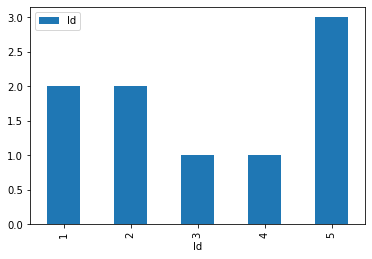

In [ ]:
count_only_id = outer.groupby("Id").agg({"Id":"count"})
count_only_id.plot(kind="bar")
plt.show()

### Mesclando índice (index)

In [ ]:
merge_index = pd.read_csv("/content/files/cfb13.csv", index_col=["Team"])
merge_index.head()

,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Deflected.Extra.Points,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akron (MAC),12,5,7,106,837,4104,4.90,30,31,342.0,59,865,4764,5.51,43,44,397.0,54,106,133,19,258,54,106,133,19,258,101,7,18,0.389,27,7,17,0.412,11,39,716,0,18.36,...,0,12,1,343,28.6,108,31,29,0,0,9,0,242,20.2,81,51,32,251,67,5.6,71,183,72,0.393,93,75,175,0.429,74,352:08,29:20,74,6,13,19,11,10,21,-2,-0.17
Alabama (SEC),13,11,2,33,826,5903,7.15,58,65,454.1,5,771,3725,4.83,21,23,286.5,4,78,101,15,194,4,78,101,15,194,33,7,12,0.583,3,5,19,0.263,51,68,1400,0,20.59,...,0,7,0,181,13.9,17,65,65,0,0,13,1,496,38.2,94,53,32,245,69,5.3,17,147,70,0.476,24,61,176,0.347,24,416:04,32:00,48,8,11,19,10,7,17,2,0.15
Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57,458.5,62,991,5214,5.26,38,39,401.1,79,122,139,15,276,79,122,139,15,276,98,12,30,0.400,43,12,26,0.462,27,41,801,0,19.54,...,0,15,1,315,24.2,36,57,53,1,0,12,1,435,33.5,65,63,28,255,77,5.9,19,212,100,0.472,61,83,211,0.393,96,370:31,28:30,39,4,18,22,11,7,18,4,0.31
Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69,457.3,42,942,5213,5.53,45,48,372.4,30,94,135,14,243,30,94,135,14,243,26,15,25,0.600,93,13,22,0.591,64,64,1365,1,21.33,...,0,14,1,373,26.6,10,69,63,1,0,25,1,556,39.7,20,85,32,413,101,7.2,76,215,84,0.391,44,79,213,0.371,51,424:56,30:21,7,12,21,33,6,12,18,15,1.07
Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30,357.2,76,814,4961,6.09,46,49,413.4,64,127,127,12,266,64,127,127,12,266,74,7,15,0.467,105,9,14,0.643,108,12,291,0,24.25,...,0,9,0,369,30.8,105,30,29,0,0,13,0,248,20.7,81,52,30,294,67,5.6,55,156,65,0.417,94,66,152,0.434,46,365:17,30:26,111,6,8,14,12,11,23,-9,-0.75


In [ ]:
merge_index2 = pd.read_csv("/content/files/cfb14.csv", index_col=["Team"])
merge_index2.head()

,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Deflected.Extra.Points,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akron (MAC),12,5,7,88,891,4479,5.03,32,33,373.3,44,859,4453,5.18,34,35,371.1,51,100,124,31,255,51,100,124,31,255,113,7,21,0.333,29,7,17,0.412,30,43,828,0,19.26,...,0,13,0,277,23.1,101,33,32,0,0,13,1,271,22.6,59,59,26,280,72,6.0,108,178,61,0.343,34,63,171,0.368,84,349:11,29:05,76,11,13,24,12,14,26,-2,-0.17
Alabama (SEC),14,12,2,17,1018,6783,6.66,67,68,484.5,12,945,4598,4.87,24,27,328.4,26,81,141,12,234,26,81,141,12,234,5,10,13,0.769,23,7,18,0.389,76,60,1291,1,21.52,...,0,23,0,258,18.4,15,68,63,1,0,14,1,517,36.9,25,73,46,360,96,6.9,4,198,102,0.515,41,82,217,0.378,20,444:38,31:45,71,9,11,20,12,10,22,-2,-0.14
Arizona (Pac-12),14,10,4,25,1139,6491,5.70,55,61,463.6,103,1115,6314,5.66,47,49,451.0,122,120,188,29,337,122,120,188,29,337,23,16,26,0.615,23,7,18,0.389,27,40,758,0,18.95,...,0,17,1,395,28.2,28,61,57,0,0,20,0,483,34.5,21,87,22,356,98,7.0,86,234,89,0.380,73,94,232,0.405,116,381:13,27:13,26,13,13,26,8,10,18,8,0.57
Arizona St. (Pac-12),13,10,3,34,975,5750,5.90,54,59,442.3,81,964,5422,5.62,39,46,417.1,58,100,146,15,261,58,100,146,15,261,92,10,23,0.435,51,14,28,0.500,109,55,1280,1,23.27,...,1,13,0,363,27.9,16,59,53,2,0,23,0,480,36.9,9,88,20,452,98,7.5,85,199,76,0.382,42,79,209,0.378,97,373:11,28:42,6,13,14,27,4,9,13,14,1.08
Arkansas (SEC),13,7,6,60,916,5278,5.76,52,56,406.0,10,821,4204,5.12,30,33,323.4,18,97,115,13,225,18,97,115,13,225,20,12,19,0.632,1,4,18,0.222,112,50,1192,1,23.84,...,0,6,0,250,19.2,42,56,52,0,0,9,0,415,31.9,52,63,36,358,81,6.2,15,187,88,0.471,59,72,182,0.396,4,442:37,34:02,27,12,12,24,11,6,17,7,0.54


In [ ]:
merge_index_1_2 = merge_index.merge(merge_index2, on="Team", how="left")
merge_index_1_2.head()

,Games_x,Win_x,Loss_x,Off.Rank_x,Off.Plays_x,Off.Yards_x,Off.Yards.Play_x,Off.TDs_x,Total.TDs_x,Off.Yards.per.Game_x,Def.Rank_x,Def.Plays_x,Yards.Allowed_x,Yards.Play.Allowed_x,Off.TDs.Allowed_x,Total.TDs.Allowed_x,Yards.Per.Game.Allowed_x,First.Down.Rank_x,First.Down.Runs_x,First.Down.Passes_x,First.Down.Penalties_x,First.Downs_x,First.Down.Def.Rank_x,Opp.First.Down.Runs_x,Opp.First.Down.Passes_x,Opp.First.Down.Penalties_x,Opp.First.Downs_x,X4th.Down.Rank_x,X4th.Attempts_x,X4th.Conversions_x,X4th.Percent_x,X4rd.Down.Def.Rank_x,Opp.4th.Conversion_x,Opp.4th.Attempt_x,Opponent.4th.Percent_x,Kickoff.Return.Rank_x,Kickoffs.Returned_x,Kickoff.Return.Yards_x,Kickoff.Return.Touchdowns_x,Avg.Yard.per.Kickoff.Return_x,...,Opp.Deflected.Extra.Points_y,Opp.Feild.Goals.Made_y,Opp.Safety_y,Points.Allowed_y,Avg.Points.per.Game.Allowed_y,Scoring.Off.Rank_y,Touchdowns_y,PAT_y,X2.Point.Conversions_y,Defensive.Points_y,Feild.Goals_y,Safety_y,Total.Points_y,Points.Per.Game_y,Tackle.for.Loss.Rank_y,Solo.Tackle.For.Loss_y,Assist.Tackle.For.Loss_y,Tackle.for.Loss.Yards_y,Total.Tackle.For.Loss_y,Tackle.For.Loss.Per.Game_y,X3rd.Down.Rank_y,X3rd.Attempts_y,X3rd.Conversions_y,X3rd.Percent_y,X3rd.Down.Def.Rank_y,Opp.3rd.Conversion_y,Opp.3rd.Attempt_y,Opponent.3rd.Percent_y,Time.of.Possession.Rank_y,Time.of.Possession_y,Average.Time.of.Possession.per.Game_y,Turnover.Rank_y,Fumbles.Recovered_y,Opponents.Intercepted_y,Turnovers.Gain_y,Fumbles.Lost_y,Interceptions.Thrown.y_y,Turnovers.Lost_y,Turnover.Margin_y,Avg.Turnover.Margin.per.Game_y
Team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Akron (MAC),12,5,7,106,837,4104,4.90,30,31,342.0,59,865,4764,5.51,43,44,397.0,54,106,133,19,258,54,106,133,19,258,101,7,18,0.389,27,7,17,0.412,11,39,716,0,18.36,...,0.0,13.0,0.0,277.0,23.1,101.0,33.0,32.0,0.0,0.0,13.0,1.0,271.0,22.6,59.0,59.0,26.0,280.0,72.0,6.0,108.0,178.0,61.0,0.343,34.0,63.0,171.0,0.368,84.0,349:11,29:05,76.0,11.0,13.0,24.0,12.0,14.0,26.0,-2.0,-0.17
Alabama (SEC),13,11,2,33,826,5903,7.15,58,65,454.1,5,771,3725,4.83,21,23,286.5,4,78,101,15,194,4,78,101,15,194,33,7,12,0.583,3,5,19,0.263,51,68,1400,0,20.59,...,0.0,23.0,0.0,258.0,18.4,15.0,68.0,63.0,1.0,0.0,14.0,1.0,517.0,36.9,25.0,73.0,46.0,360.0,96.0,6.9,4.0,198.0,102.0,0.515,41.0,82.0,217.0,0.378,20.0,444:38,31:45,71.0,9.0,11.0,20.0,12.0,10.0,22.0,-2.0,-0.14
Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57,458.5,62,991,5214,5.26,38,39,401.1,79,122,139,15,276,79,122,139,15,276,98,12,30,0.400,43,12,26,0.462,27,41,801,0,19.54,...,0.0,17.0,1.0,395.0,28.2,28.0,61.0,57.0,0.0,0.0,20.0,0.0,483.0,34.5,21.0,87.0,22.0,356.0,98.0,7.0,86.0,234.0,89.0,0.380,73.0,94.0,232.0,0.405,116.0,381:13,27:13,26.0,13.0,13.0,26.0,8.0,10.0,18.0,8.0,0.57
Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69,457.3,42,942,5213,5.53,45,48,372.4,30,94,135,14,243,30,94,135,14,243,26,15,25,0.600,93,13,22,0.591,64,64,1365,1,21.33,...,1.0,13.0,0.0,363.0,27.9,16.0,59.0,53.0,2.0,0.0,23.0,0.0,480.0,36.9,9.0,88.0,20.0,452.0,98.0,7.5,85.0,199.0,76.0,0.382,42.0,79.0,209.0,0.378,97.0,373:11,28:42,6.0,13.0,14.0,27.0,4.0,9.0,13.0,14.0,1.08
Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30,357.2,76,814,4961,6.09,46,49,413.4,64,127,127,12,266,64,127,127,12,266,74,7,15,0.467,105,9,14,0.643,108,12,291,0,24.25,...,0.0,6.0,0.0,250.0,19.2,42.0,56.0,52.0,0.0,0.0,9.0,0.0,415.0,31.9,52.0,63.0,36.0,358.0,81.0,6.2,15.0,187.0,88.0,0.471,59.0,72.0,182.0,0.396,4.0,442:37,34:02,27.0,12.0,12.0,24.0,11.0,6.0,17.0,7.0,0.54


## Mesclando Dados Ordenados e Séries Temporais

In [ ]:
# Criando novo conjunto de dados DataFrame
temp1 = [("2019-01-01", 12000), ("2018-01-01", 10000), ("2017-01-01", 12000), ("2016-01-01", 11000)]
df_temp1 = pd.DataFrame(temp1, columns=["date", "value"])

# Convertendo de int64 para datetime
df_temp1["date"] = pd.to_datetime(df_temp1["date"])
df_temp1

,date,value
0,2019-01-01,12000
1,2018-01-01,10000
2,2017-01-01,12000
3,2016-01-01,11000


In [ ]:
temp2 = [("2021-01-01", 18000), ("2020-01-01", 13000), ("2019-01-01", 21000), ("2018-01-01", 23000), ("2017-01-01", 12000), ("2016-01-01", 11000)]
df_temp2 = pd.DataFrame(temp2, columns=["date", "value"])
df_temp2["date"] = pd.to_datetime(df_temp2["date"])
df_temp2

,date,value
0,2021-01-01,18000
1,2020-01-01,13000
2,2019-01-01,21000
3,2018-01-01,23000
4,2017-01-01,12000
5,2016-01-01,11000


### Método merge_ordered()

- Método para mesclar séries temporais e outros dados ordenados.
- O padrão para o método merge é "interno", e "externo" para o método merge_order

In [ ]:
# O argumento sufixos é para determinar a tabela de origem dos dados
temp1_2 = pd.merge_ordered(df_temp1, df_temp2, on="date", suffixes=("_temp1", "_temp2"))
temp1_2

,date,value_temp1,value_temp2
0,2016-01-01,11000.0,11000
1,2017-01-01,12000.0,12000
2,2018-01-01,10000.0,23000
3,2019-01-01,12000.0,21000
4,2020-01-01,NaN,13000
5,2021-01-01,NaN,18000


### Forward fill

In [ ]:
# preenchimento progressivo irá interpolar os dados perdidos preenchendo os valores ausentes com o valor anterior
temp1_2 = pd.merge_ordered(df_temp1, df_temp2, on="date", suffixes=("_temp1", "_temp2"), fill_method="ffill")
temp1_2

,date,value_temp1,value_temp2
0,2016-01-01,11000,11000
1,2017-01-01,12000,12000
2,2018-01-01,10000,23000
3,2019-01-01,12000,21000
4,2020-01-01,12000,13000
5,2021-01-01,12000,18000


### Método merge_asof ()

- Recurso semelhante a merge_ordered (), ao contrário de uma junção à esquerda ordenada, merge_asof () irá corresponder às colunas de valor mais próximas ao invés de valores iguais.
- Importante - quaisquer colunas nas quais você mesclar devem ser classificadas
- Usar em um processo que as datas ou horas podem não estar exatamente alinhadas ou um conjunto de treinamento de série temporal.

In [ ]:
temp1_asof = [("2019-01-01 10:00:00", 120), ("2019-01-01 12:00:00", 100), ("2019-01-01 14:00:00", 120), ("2019-01-01 16:00:00", 110)]
df_temp1_asof = pd.DataFrame(temp1_asof, columns=["date", "value"])
df_temp1_asof["date"] = pd.to_datetime(df_temp1_asof["date"])
df_temp1_asof

,date,value
0,2019-01-01 10:00:00,120
1,2019-01-01 12:00:00,100
2,2019-01-01 14:00:00,120
3,2019-01-01 16:00:00,110


In [ ]:
temp2_asof = [("2019-01-01 14:00:00", 180), ("2019-01-01 16:00:00", 130), ("2019-01-01 18:00:00", 210), ("2019-01-01 20:00:00", 230), ("2019-01-01 22:00:00", 120), ("2019-01-01 22:30:00", 110)]
df_temp2_asof = pd.DataFrame(temp2_asof, columns=["date", "value"])
df_temp2_asof["date"] = pd.to_datetime(df_temp2_asof["date"])
df_temp2_asof

,date,value
0,2019-01-01 14:00:00,180
1,2019-01-01 16:00:00,130
2,2019-01-01 18:00:00,210
3,2019-01-01 20:00:00,230
4,2019-01-01 22:00:00,120
5,2019-01-01 22:30:00,110


In [ ]:
# O argumento sufixos é para determinar a tabela de origem dos dados
temp_asof = pd.merge_asof(df_temp2_asof, df_temp1_asof, on="date", suffixes=("_one", "_two"))
temp_asof

,date,value_one,value_two
0,2019-01-01 14:00:00,180,120
1,2019-01-01 16:00:00,130,110
2,2019-01-01 18:00:00,210,110
3,2019-01-01 20:00:00,230,110
4,2019-01-01 22:00:00,120,110
5,2019-01-01 22:30:00,110,110


In [ ]:
# Calcula a diferença de um elemento do Dataframe em comparação com outro
# elemento no Dataframe (o padrão é o elemento na linha anterior).
temp_asof_diffs = temp_asof.diff()
temp_asof_diffs

,date,value_one,value_two
0,NaT,NaN,NaN
1,0 days 02:00:00,-50.0,-10.0
2,0 days 02:00:00,80.0,0.0
3,0 days 02:00:00,20.0,0.0
4,0 days 02:00:00,-110.0,0.0
5,0 days 00:30:00,-10.0,0.0


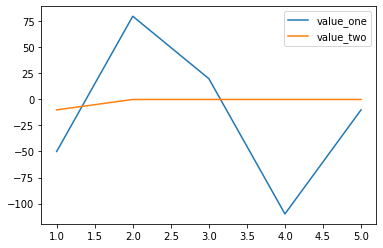

In [ ]:
temp_asof_diffs.plot(y=["value_one", "value_two"])
plt.show()

### Seleção de dados com .query()

O método query () aceita uma string de entrada que será usada para selecionar as linhas a serem retornadas do dataset.

In [ ]:
df20.head()

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
0,Air Force (Mountain West),6,3,3,73,373,2336,6.26,19,389.3,8,360,1820,5.06,11,12,303.3,14,52,46,8,106,14,52,46,8,106,14,8,11,0.727,9,3,10,0.300,96,14,9,324,1,...,2,0,90,15.0,92,19,17,0,0,5,0,146,24.3,125,11,12,74,17,2.8,13,68,33,0.485,105,34,73,0.466,19,195:00,32:30,58,3,5,8,5,3,8,0,0.00,2020
1,Akron (MAC),6,1,5,121,360,1687,4.69,12,281.2,110,365,2759,7.56,31,34,459.8,24,68,49,7,124,24,68,49,7,124,98,4,9,0.444,73,4,7,0.571,67,16,6,340,0,...,4,0,248,41.3,120,13,13,0,0,4,0,103,17.2,126,16,0,78,16,2.7,108,78,26,0.333,125,39,73,0.534,52,183:27,30:35,98,4,2,6,3,6,9,-3,-0.50,2020
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,33,767,3863,5.04,25,25,351.2,92,76,119,21,216,92,76,119,21,216,102,3,7,0.429,77,11,19,0.579,34,33,17,610,0,...,13,0,214,19.5,2,73,73,0,0,12,0,547,49.7,39,59,30,272,74,6.7,1,125,74,0.592,71,69,170,0.406,48,338:15,30:45,12,10,11,21,7,4,11,10,0.91,2020
3,App State (Sun Belt),12,9,3,26,845,5424,6.42,49,452.0,18,798,3946,4.94,27,30,328.8,101,105,95,23,223,101,105,95,23,223,61,11,20,0.550,40,13,27,0.481,16,42,17,728,1,...,12,0,240,20.0,30,52,51,0,0,13,2,406,33.8,80,47,42,281,68,5.7,7,162,83,0.512,41,65,172,0.378,21,387:30,32:18,57,3,15,18,6,11,17,1,0.08,2020
4,Arizona (Pac-12),5,0,5,86,373,1847,4.95,10,369.4,116,351,2365,6.74,25,26,473.0,16,55,43,10,108,16,55,43,10,108,122,3,12,0.250,88,5,8,0.625,127,2,17,110,1,...,6,0,199,39.8,118,10,9,0,0,6,0,87,17.4,95,21,8,58,25,5.0,113,79,26,0.329,87,27,63,0.429,103,140:06,28:01,126,1,2,3,5,7,12,-9,-1.80,2020


In [ ]:
# Times com as maiores vitórias e sem derrotas
df20.query('Win > 9 and Loss < 1')

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,33,767,3863,5.04,25,25,351.2,92,76,119,21,216,92,76,119,21,216,102,3,7,0.429,77,11,19,0.579,34,33,17,610,0,...,13,0,214,19.5,2,73,73,0,0,12,0,547,49.7,39,59,30,272,74,6.7,1,125,74,0.592,71,69,170,0.406,48,338:15,30:45,12,10,11,21,7,4,11,10,0.91,2020
22,Coastal Carolina (Sun Belt),11,11,0,27,740,4915,6.64,55,446.8,25,699,3748,5.36,24,25,340.7,74,86,98,13,197,74,86,98,13,197,6,12,15,0.800,20,10,25,0.400,32,43,17,793,0,...,12,0,206,18.7,18,56,47,1,0,9,0,412,37.5,53,53,34,322,70,6.4,4,138,75,0.543,38,52,139,0.374,5,376:44,34:15,9,8,14,22,7,4,11,11,1.00,2020


In [ ]:
df20.query('Loss < 2 or Games < 3')

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
2,Alabama (SEC),11,11,0,5,764,5983,7.83,68,543.9,33,767,3863,5.04,25,25,351.2,92,76,119,21,216,92,76,119,21,216,102,3,7,0.429,77,11,19,0.579,34,33,17,610,0,...,13,0,214,19.5,2,73,73,0,0,12,0,547,49.7,39,59,30,272,74,6.7,1,125,74,0.592,71,69,170,0.406,48,338:15,30:45,12,10,11,21,7,4,11,10,0.91,2020
10,Ball St. (MAC),7,6,1,24,547,3176,5.81,28,453.7,93,511,3092,6.05,25,25,441.7,58,58,94,14,166,58,58,94,14,166,62,6,11,0.545,12,6,17,0.353,13,27,13,460,0,...,6,0,193,27.6,26,30,24,3,0,10,0,240,34.3,26,39,24,198,51,7.3,21,105,50,0.476,52,36,92,0.391,68,207:52,29:42,9,8,6,14,1,6,7,7,1.00,2020
15,Buffalo (MAC),7,6,1,17,457,3349,7.33,39,478.4,36,483,2513,5.20,18,19,359.0,35,65,60,14,139,35,65,60,14,139,69,7,13,0.538,71,9,16,0.562,97,23,25,534,0,...,7,0,153,21.9,5,43,43,0,0,1,0,304,43.4,87,28,20,158,38,5.4,18,81,39,0.481,11,31,99,0.313,49,214:58,30:43,28,4,6,10,2,4,6,4,0.57,2020
16,BYU (FBS Independent),12,11,1,7,799,6266,7.84,68,522.2,13,793,3809,4.80,23,23,317.4,92,89,115,12,216,92,89,115,12,216,62,12,22,0.545,20,10,25,0.400,3,23,51,358,0,...,9,0,184,15.3,4,69,63,3,0,13,0,522,43.5,95,50,20,214,60,5.0,10,132,65,0.492,54,67,171,0.392,64,359:25,29:57,19,10,8,18,5,4,9,9,0.75,2020
20,Cincinnati (AAC),9,9,0,19,612,4205,6.87,46,467.2,11,647,2830,4.37,15,16,314.4,65,68,80,27,175,65,68,80,27,175,20,9,13,0.692,19,9,23,0.391,85,21,25,473,0,...,10,0,144,16.0,15,48,45,0,0,7,0,354,39.3,23,51,32,273,67,7.4,14,118,57,0.483,27,50,140,0.357,25,288:35,32:04,37,4,15,19,9,6,15,4,0.44,2020


In [ ]:
df20.query('Team=="Buffalo" or Team=="Ohio (MAC)"')

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,Avg.Yard.per.Kickoff.Return,...,Opp.Feild.Goals.Made,Opp.Safety,Points.Allowed,Avg.Points.per.Game.Allowed,Scoring.Off.Rank,Touchdowns,PAT,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year
74,Ohio (MAC),3,2,1,92,171,1088,6.36,12,362.7,54,213,1167,5.48,6,6,389.0,1,28,26,2,56,1,28,26,2,56,127,0,1,0.0,15,4,11,0.364,44,12,4,234,0,...,3,0,50,16.7,25,14,13,0,0,2,0,103,34.3,120,11,2,39,12,4.0,88,32,12,0.375,17,15,44,0.341,80,87:28,29:09,4,1,5,6,2,0,2,4,1.33,2020


### Remodelar Dados .melt()

In [ ]:
df13_red.head()

,Team,Games,Win,Loss,Off.Rank
0,Akron (MAC),12,5,7,106
1,Alabama (SEC),13,11,2,33
2,Arizona (Pac-12),13,8,5,31
3,Arizona St. (Pac-12),14,10,4,32
4,Arkansas (SEC),12,3,9,99


In [ ]:
# id_vars será a coluna mantida
df13_red_melt = df13_red.melt(id_vars=["Team"])
df13_red_melt.head(10)

,Team,variable,value
0,Akron (MAC),Games,12
1,Alabama (SEC),Games,13
2,Arizona (Pac-12),Games,13
3,Arizona St. (Pac-12),Games,14
4,Arkansas (SEC),Games,12
5,Arkansas St. (Sun Belt),Games,13
6,Army West Point (FBS Independent),Games,12
7,Auburn (SEC),Games,14
8,Ball St. (MAC),Games,13
9,Baylor (Big 12),Games,13


In [ ]:
df13_red_melt.shape

(444, 3)

In [ ]:
df13_red.shape

(111, 5)

In [ ]:
# var_name irá nomear a coluna e value_name nomeará a coluna com valores
df13_red_melt = df13_red.melt(id_vars=["Team"], var_name=["Statistics"], value_name="Number")
df13_red_melt.head(10)

,Team,Statistics,Number
0,Akron (MAC),Games,12
1,Alabama (SEC),Games,13
2,Arizona (Pac-12),Games,13
3,Arizona St. (Pac-12),Games,14
4,Arkansas (SEC),Games,12
5,Arkansas St. (Sun Belt),Games,13
6,Army West Point (FBS Independent),Games,12
7,Auburn (SEC),Games,14
8,Ball St. (MAC),Games,13
9,Baylor (Big 12),Games,13


## Mesclagens e Concateções Avançadas

### Concatenando DataFrames -  verticalmente

Os dados terão virão de diversas tabelas e será necessário juntos os diversos dataset.

In [ ]:
# Cada DataFrame tras seu index, tendo assim duplicidade
df_all = pd.concat([df13, df14, df15, df16, df17, df18, df19, df20])
df_all.shape

(970, 154)

In [ ]:
df_all

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,...,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed
0,Akron (MAC),12,5,7,106,837,4104,4.90,30,31.0,342.0,59,865,4764,5.51,43,44,397.0,54,106,133,19,258,54,106,133,19,258,101,7,18,0.389,27,7,17,0.412,11,39,716,0,...,0,0,9,0,242,20.2,81,51,32,251,67,5.6,71,183,72,0.393,93,75,175,0.429,74,352:08,29:20,74,6,13,19,11,10,21,-2,-0.17,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65.0,454.1,5,771,3725,4.83,21,23,286.5,4,78,101,15,194,4,78,101,15,194,33,7,12,0.583,3,5,19,0.263,51,68,1400,0,...,0,0,13,1,496,38.2,94,53,32,245,69,5.3,17,147,70,0.476,24,61,176,0.347,24,416:04,32:00,48,8,11,19,10,7,17,2,0.15,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57.0,458.5,62,991,5214,5.26,38,39,401.1,79,122,139,15,276,79,122,139,15,276,98,12,30,0.400,43,12,26,0.462,27,41,801,0,...,1,0,12,1,435,33.5,65,63,28,255,77,5.9,19,212,100,0.472,61,83,211,0.393,96,370:31,28:30,39,4,18,22,11,7,18,4,0.31,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69.0,457.3,42,942,5213,5.53,45,48,372.4,30,94,135,14,243,30,94,135,14,243,26,15,25,0.600,93,13,22,0.591,64,64,1365,1,...,1,0,25,1,556,39.7,20,85,32,413,101,7.2,76,215,84,0.391,44,79,213,0.371,51,424:56,30:21,7,12,21,33,6,12,18,15,1.07,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30.0,357.2,76,814,4961,6.09,46,49,413.4,64,127,127,12,266,64,127,127,12,266,74,7,15,0.467,105,9,14,0.643,108,12,291,0,...,0,0,13,0,248,20.7,81,52,30,294,67,5.6,55,156,65,0.417,94,66,152,0.434,46,365:17,30:26,111,6,8,14,12,11,23,-9,-0.75,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,NaN,422.7,5,561,2675,4.77,20,23,297.2,40,61,63,20,144,40,61,63,20,144,76,11,21,0.524,88,5,8,0.625,41,34,7,648,...,0,0,13,0,241,26.8,38,54,14,237,61,6.8,60,145,59,0.407,58,50,127,0.394,18,293:40,32:38,42,2,10,12,6,3,9,3,0.33,2020,19.06,41.0,34.0,7.0,648.0,1.0,19.06
123,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,NaN,290.9,21,741,3700,4.99,31,34,336.4,81,107,83,15,205,81,107,83,15,205,51,17,29,0.586,71,18,32,0.562,66,21,18,443,...,0,0,13,0,207,18.8,73,52,24,229,64,5.8,116,145,46,0.317,59,64,162,0.395,72,323:17,29:23,83,4,5,9,10,2,12,-3,-0.27,2020,21.10,66.0,21.0,18.0,443.0,1.0,21.10
124,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,NaN,479.7,60,428,

In [ ]:
# O parâmetro ignore_index faz índice sequencial para todo DataFrame
# o parâmetro key nomeira multnível de índice.

df_all2 = pd.concat([df13, df14, df15, df16, df17, df18, df19, df20], 
                   ignore_index=False, 
                   keys=["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"])
df_all2.shape

(970, 154)

In [ ]:
df_all2

Team  ...  Avg.Yards.per.Kickoff.Return.Allowed
2013 0                Akron (MAC)  ...                                   NaN
     1              Alabama (SEC)  ...                                   NaN
     2           Arizona (Pac-12)  ...                                   NaN
     3       Arizona St. (Pac-12)  ...                                   NaN
     4             Arkansas (SEC)  ...                                   NaN
...                           ...  ...                                   ...
2020 122   West Virginia (Big 12)  ...                                 19.06
     123      Western Ky. (C-USA)  ...                                 21.10
     124      Western Mich. (MAC)  ...                                 19.95
     125      Wisconsin (Big Ten)  ...                                 21.08
     126  Wyoming (Mountain West)  ...                                 23.94

[970 rows x 154 columns]

In [ ]:
# Dados com agrupamento por Year
df_all2.groupby("Year")[["Games", "Win", "Loss"]].sum()

,Games,Win,Loss
Year,,,
2013,1409,753,656
2014,1436,759,677
2015,1468,787,681
2016,1479,784,695
2017,1638,862,776
2018,1644,871,773
2019,1662,885,777
2020,1064,548,516


In [ ]:
# Total de jogos, vitórias e derrotas por ano com estatísticas básicas
df_all2.groupby("Year")[["Games", "Win", "Loss"]].agg([min, max, sum])

Games           Win          Loss         
       min max   sum min max  sum  min max  sum
Year                                           
2013    12  14  1409   0  14  753    0  12  656
2014    11  15  1436   1  14  759    1  11  677
2015    12  15  1468   0  14  787    1  12  681
2016    12  15  1479   2  14  784    1  10  695
2017    11  15  1638   0  13  862    0  12  776
2018    11  15  1644   1  15  871    0  11  773
2019    12  15  1662   0  15  885    0  12  777
2020     3  13  1064   0  11  548    0  10  516

### Método .append

- Append é um método concat simplificado, em comparação.
- Suporta os parâmetros ignore_index e sort. 
- Não oferece suporte a chaves ou junção e a junção (join) é por padrão externo.

In [ ]:
df13_append = df13.append([df14, df15, df16, df17, df18, df19, df20],
            ignore_index=True)
df13_append

,Team,Games,Win,Loss,Off.Rank,Off.Plays,Off.Yards,Off.Yards.Play,Off.TDs,Total.TDs,Off.Yards.per.Game,Def.Rank,Def.Plays,Yards.Allowed,Yards.Play.Allowed,Off.TDs.Allowed,Total.TDs.Allowed,Yards.Per.Game.Allowed,First.Down.Rank,First.Down.Runs,First.Down.Passes,First.Down.Penalties,First.Downs,First.Down.Def.Rank,Opp.First.Down.Runs,Opp.First.Down.Passes,Opp.First.Down.Penalties,Opp.First.Downs,X4th.Down.Rank,X4th.Attempts,X4th.Conversions,X4th.Percent,X4rd.Down.Def.Rank,Opp.4th.Conversion,Opp.4th.Attempt,Opponent.4th.Percent,Kickoff.Return.Rank,Kickoffs.Returned,Kickoff.Return.Yards,Kickoff.Return.Touchdowns,...,X2.Point.Conversions,Defensive.Points,Feild.Goals,Safety,Total.Points,Points.Per.Game,Tackle.for.Loss.Rank,Solo.Tackle.For.Loss,Assist.Tackle.For.Loss,Tackle.for.Loss.Yards,Total.Tackle.For.Loss,Tackle.For.Loss.Per.Game,X3rd.Down.Rank,X3rd.Attempts,X3rd.Conversions,X3rd.Percent,X3rd.Down.Def.Rank,Opp.3rd.Conversion,Opp.3rd.Attempt,Opponent.3rd.Percent,Time.of.Possession.Rank,Time.of.Possession,Average.Time.of.Possession.per.Game,Turnover.Rank,Fumbles.Recovered,Opponents.Intercepted,Turnovers.Gain,Fumbles.Lost,Interceptions.Thrown.y,Turnovers.Lost,Turnover.Margin,Avg.Turnover.Margin.per.Game,Year,...40,Kickoff.Return.Def.Rank,Opp.Kickoff.Returns,Kickoff.Touchbacks,Opponent.Kickoff.Return.Yards,Opp.Kickoff.Return.Touchdowns.Allowed,Avg.Yards.per.Kickoff.Return.Allowed
0,Akron (MAC),12,5,7,106,837,4104,4.90,30,31.0,342.0,59,865,4764,5.51,43,44,397.0,54,106,133,19,258,54,106,133,19,258,101,7,18,0.389,27,7,17,0.412,11,39,716,0,...,0,0,9,0,242,20.2,81,51,32,251,67,5.6,71,183,72,0.393,93,75,175,0.429,74,352:08,29:20,74,6,13,19,11,10,21,-2,-0.17,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama (SEC),13,11,2,33,826,5903,7.15,58,65.0,454.1,5,771,3725,4.83,21,23,286.5,4,78,101,15,194,4,78,101,15,194,33,7,12,0.583,3,5,19,0.263,51,68,1400,0,...,0,0,13,1,496,38.2,94,53,32,245,69,5.3,17,147,70,0.476,24,61,176,0.347,24,416:04,32:00,48,8,11,19,10,7,17,2,0.15,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona (Pac-12),13,8,5,31,1030,5960,5.79,52,57.0,458.5,62,991,5214,5.26,38,39,401.1,79,122,139,15,276,79,122,139,15,276,98,12,30,0.400,43,12,26,0.462,27,41,801,0,...,1,0,12,1,435,33.5,65,63,28,255,77,5.9,19,212,100,0.472,61,83,211,0.393,96,370:31,28:30,39,4,18,22,11,7,18,4,0.31,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona St. (Pac-12),14,10,4,32,1102,6402,5.81,64,69.0,457.3,42,942,5213,5.53,45,48,372.4,30,94,135,14,243,30,94,135,14,243,26,15,25,0.600,93,13,22,0.591,64,64,1365,1,...,1,0,25,1,556,39.7,20,85,32,413,101,7.2,76,215,84,0.391,44,79,213,0.371,51,424:56,30:21,7,12,21,33,6,12,18,15,1.07,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arkansas (SEC),12,3,9,99,775,4286,5.53,29,30.0,357.2,76,814,4961,6.09,46,49,413.4,64,127,127,12,266,64,127,127,12,266,74,7,15,0.467,105,9,14,0.643,108,12,291,0,...,0,0,13,0,248,20.7,81,52,30,294,67,5.6,55,156,65,0.417,94,66,152,0.434,46,365:17,30:26,111,6,8,14,12,11,23,-9,-0.75,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,West Virginia (Big 12),9,5,4,42,690,3804,5.51,28,NaN,422.7,5,561,2675,4.77,20,23,297.2,40,61,63,20,144,40,61,63,20,144,76,11,21,0.524,88,5,8,0.625,41,34,7,648,...,0,0,13,0,241,26.8,38,54,14,237,61,6.8,60,145,59,0.407,58,50,127,0.394,18,293:40,32:38,42,2,10,12,6,3,9,3,0.33,2020,19.06,41.0,34.0,7.0,648.0,1.0,19.06
966,Western Ky. (C-USA),11,5,6,120,699,3200,4.58,21,NaN,290.9,21,741,3700,4.99,31,34,336.4,81,107,83,15,205,81,107,83,15,205,51,17,29,0.586,71,18,32,0.562,66,21,18,443,...,0,0,13,0,207,18.8,73,52,24,229,64,5.8,116,145,46,0.317,59,64,162,0.395,72,323:17,29:23,83,4,5,9,10,2,12,-3,-0.27,2020,21.10,66.0,21.0,18.0,443.0,1.0,21.10
967,Western Mich. (MAC),6,4,2,15,392,2878,7.34,32,NaN,479.7,60,428,

### Reformatação com indexação hierárquica

- stack Faz a “rotação” ou o pivoteamento das colunas dos dados para as linhas.

- unstack Faz o pivoteamento das linhas para as colunas.

In [ ]:
df13_red.stack()

0    Team                Akron (MAC)
     Games                        12
     Win                           5
     Loss                          7
     Off.Rank                    106
                        ...         
110  Team        Wisconsin (Big Ten)
     Games                        13
     Win                           9
     Loss                          4
     Off.Rank                     18
Length: 555, dtype: object

In [ ]:
df13_red.unstack()

Team      0               Akron (MAC)
          1             Alabama (SEC)
          2          Arizona (Pac-12)
          3      Arizona St. (Pac-12)
          4            Arkansas (SEC)
                         ...         
Off.Rank  106                      54
          107                      62
          108                      30
          109                     110
          110                      18
Length: 555, dtype: object